In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("matches.csv")
data.head(5)

,team1,team2,innings1_overs,innings1_wickets,innings1_runs,innings2_overs,innings2_wickets,innings2_runs,year
0,SRI LANKA,ZIMBABWE,50.0,7,272,47.2,10,213,2001
1,NETHERLANDS,CANADA,50.0,7,289,43.0,10,172,2007
2,ZIMBABWE,SOUTH AFRICA,50.0,8,174,34.2,1,175,2003
3,INDIA,NEW ZEALAND,49.0,10,276,45.2,10,236,2010
4,AUSTRALIA,NEW ZEALAND,48.4,10,181,50.0,8,182,2009


## Prforming EDA

In [3]:
data.columns

Index(['team1', 'team2', 'innings1_overs', 'innings1_wickets', 'innings1_runs',
       'innings2_overs', 'innings2_wickets', 'innings2_runs', 'year'],
      dtype='object')

In [4]:
data.isnull().sum()

team1               0
team2               0
innings1_overs      0
innings1_wickets    0
innings1_runs       0
innings2_overs      0
innings2_wickets    0
innings2_runs       0
year                0
dtype: int64

In [5]:
data['team1'].values

array(['SRI LANKA', 'NETHERLANDS', 'ZIMBABWE', ..., 'NEW ZEALAND',
       'AUSTRALIA', 'KENYA'], dtype=object)

In [6]:
data['team2'].values

array(['ZIMBABWE', 'CANADA', 'SOUTH AFRICA', ..., 'ZIMBABWE',
       'SOUTH AFRICA', 'SCOTLAND'], dtype=object)

In [7]:
data['team1'] = pd.get_dummies(data['team1'])

In [8]:
data['team2'] = pd.get_dummies(data['team2'])

In [9]:
data.head()

,team1,team2,innings1_overs,innings1_wickets,innings1_runs,innings2_overs,innings2_wickets,innings2_runs,year
0,0,0,50.0,7,272,47.2,10,213,2001
1,0,0,50.0,7,289,43.0,10,172,2007
2,0,0,50.0,8,174,34.2,1,175,2003
3,0,0,49.0,10,276,45.2,10,236,2010
4,0,0,48.4,10,181,50.0,8,182,2009


In [53]:
data.corr()

,team1,team2,innings1_overs,innings1_wickets,innings1_runs,innings2_overs,innings2_wickets,innings2_runs
team1,1.000000,-0.013555,-0.017929,0.045796,-0.024733,-0.020722,0.011698,-0.027684
team2,-0.013555,1.000000,-0.005223,0.046164,-0.027556,-0.015460,0.009358,-0.017787
innings1_overs,-0.017929,-0.005223,1.000000,-0.164192,0.547677,0.617141,0.285340,0.413507
innings1_wickets,0.045796,0.046164,-0.164192,1.000000,-0.538340,-0.210299,-0.298762,-0.263535
innings1_runs,-0.024733,-0.027556,0.547677,-0.538340,1.000000,0.455345,0.477859,0.576052
innings2_overs,-0.020722,-0.015460,0.617141,-0.210299,0.455345,1.000000,0.385690,0.710655
innings2_wickets,0.011698,0.009358,0.285340,-0.298762,0.477859,0.385690,1.000000,0.083467
innings2_runs,-0.027684,-0.017787,0.413507,-0.263535,0.576052,0.710655,0.083467,1.000000


In [10]:
import matplotlib.pyplot as plt

{'whiskers': [<matplotlib.lines.Line2D at 0x1cad1c1a6d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1cad1c1ad90>,
 'boxes': [<matplotlib.lines.Line2D at 0x1cad1c1a370>],
 'medians': [<matplotlib.lines.Line2D at 0x1cad1c2d490>],
 'fliers': [<matplotlib.lines.Line2D at 0x1cad1c2d790>],
 'means': []}

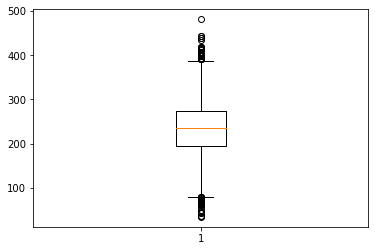

In [11]:
plt.boxplot(data['innings1_runs'])

In [12]:
data['innings1_runs'].describe()

count    4037.000000
mean      234.005697
std        60.683718
min        35.000000
25%       196.000000
50%       235.000000
75%       273.000000
max       481.000000
Name: innings1_runs, dtype: float64

In [13]:
del data['year']

In [14]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [15]:
y

0       213
1       172
2       175
3       236
4       182
       ... 
4032    221
4033    230
4034    158
4035    218
4036    253
Name: innings2_runs, Length: 4037, dtype: int64

In [16]:
from sklearn.model_selection import train_test_split as tts

In [40]:
x_train,x_test,y_train,y_test = tts(x,y,test_size = 0.6)

In [41]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1614, 7), (2423, 7), (1614,), (2423,))

## Building Model 

In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
sc =  StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [44]:
from sklearn.linear_model import LinearRegression
lin = LinearRegression()
lin.fit(x_train,y_train)

LinearRegression()

In [45]:
from sklearn.ensemble import RandomForestRegressor

In [46]:
lin = RandomForestRegressor(n_estimators = 100, max_features = None)
lin.fit(x_train,y_train)

RandomForestRegressor(max_features=None)

In [47]:
y_predict = lin.predict(x_test)

In [48]:
score = lin.score(x_test,y_test)*100

In [51]:
score

79.78385308199603